# Simulation Quality per Detector
Check the quality of the simulation result at each SDD.   

For the first case, I define quality as the square root of the number of captured photons.This definition is in line with the central limiting theorem. According to this theorem, the variance in random sampling is inversely proportional to square root of the number of samples. i.e, if the number of samples increases 100 fold, accuracy improves 10 fold. For a bit more explanation, try this [blog](https://stats.libretexts.org/Bookshelves/Computing_and_Modeling/RTG%3A_Simulating_High_Dimensional_Data/The_Monte_Carlo_Simulation_V2)




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
snr_data = pd.read_pickle('/home/rraiyan/personal_projects/tfo_inverse_modelling/data/snr/snr1.pkl')

/tmp/ipykernel_3584762/3608729948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['SNR2'] = filtered_data['SNR'].pow(1/2)
/tmp/ipykernel_3584762/3608729948.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['SNR3'] = filtered_data['Fetal SNR'].pow(1/2)


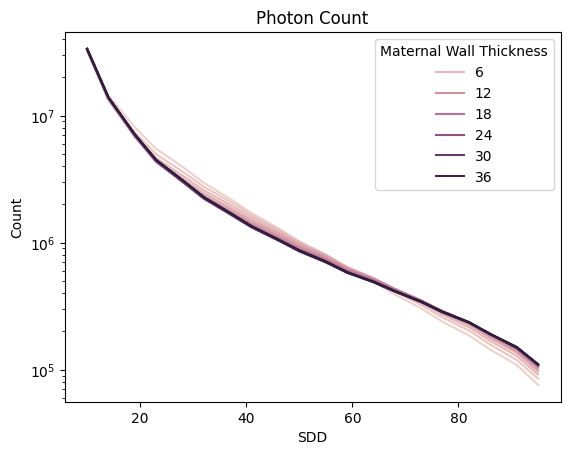

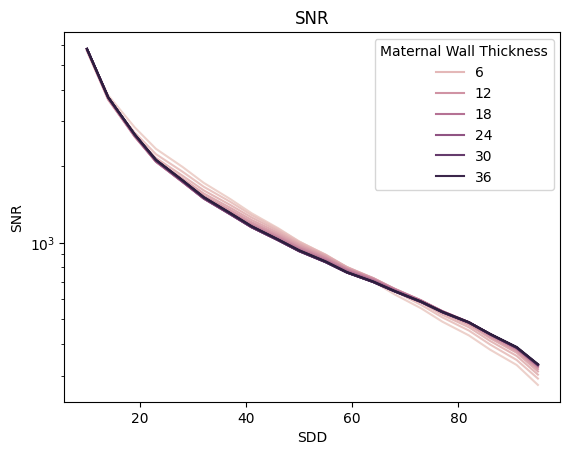

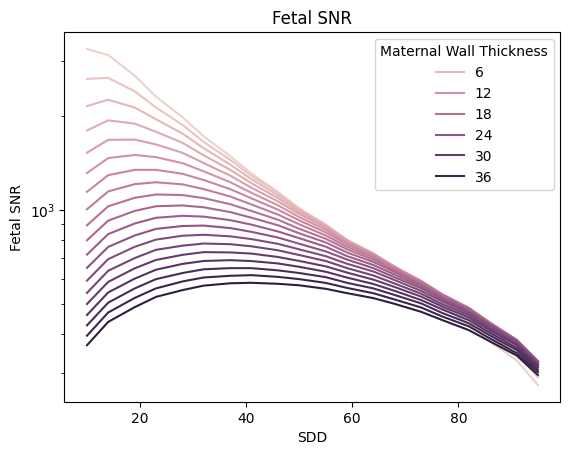

In [3]:
filtered_data = snr_data[(snr_data['Wave Int'] == 1)]

plt.figure()
plt.title('Photon Count')
sns.lineplot(data=filtered_data, x='SDD', y='SNR', hue='Maternal Wall Thickness')
plt.ylabel("Count")
plt.yscale('log')

filtered_data['SNR2'] = filtered_data['SNR'].pow(1/2)
plt.figure()
plt.title('SNR')
sns.lineplot(data=filtered_data, x='SDD', y='SNR2', hue='Maternal Wall Thickness')
plt.ylabel("SNR")
plt.yscale('log')

filtered_data['SNR3'] = filtered_data['Fetal SNR'].pow(1/2)
plt.figure()
plt.title('Fetal SNR')
sns.lineplot(data=filtered_data, x='SDD', y='SNR3', hue='Maternal Wall Thickness')
plt.ylabel("Fetal SNR")
plt.yscale('log')



## Notes
From these plots, the near detector has 13dB(WV1) to 14dB(WV2) more SNR than the far detector. Additionally, this distribution is not log-linear. Its more of a curved log. The curvature is also different for each depth.

/tmp/ipykernel_3584762/700677572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ratio'] = filtered_data['Fetal SNR'] / filtered_data['SNR']


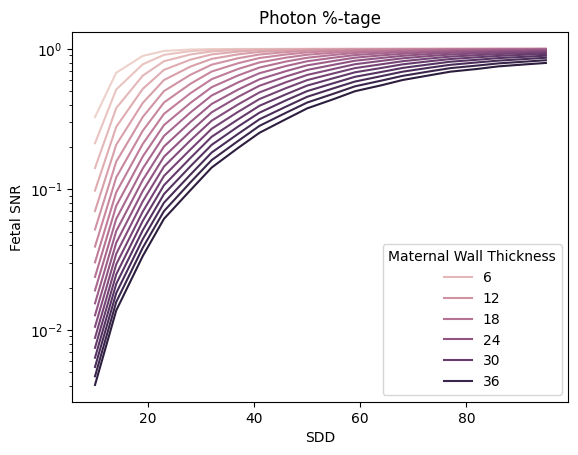

In [5]:
filtered_data['Ratio'] = filtered_data['Fetal SNR'] / filtered_data['SNR']
plt.figure()
plt.title('Photon %-tage')
sns.lineplot(data=filtered_data, x='SDD', y='Ratio', hue='Maternal Wall Thickness')
plt.ylabel("Fetal SNR")
plt.yscale('log')
